In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r"C:/Users/yalam/Downloads/StudentsPerformace.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


***With this dataset, we can predict the math score values using other independent variables, which collaboratively work on training the model that can predict math score of the student.***

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

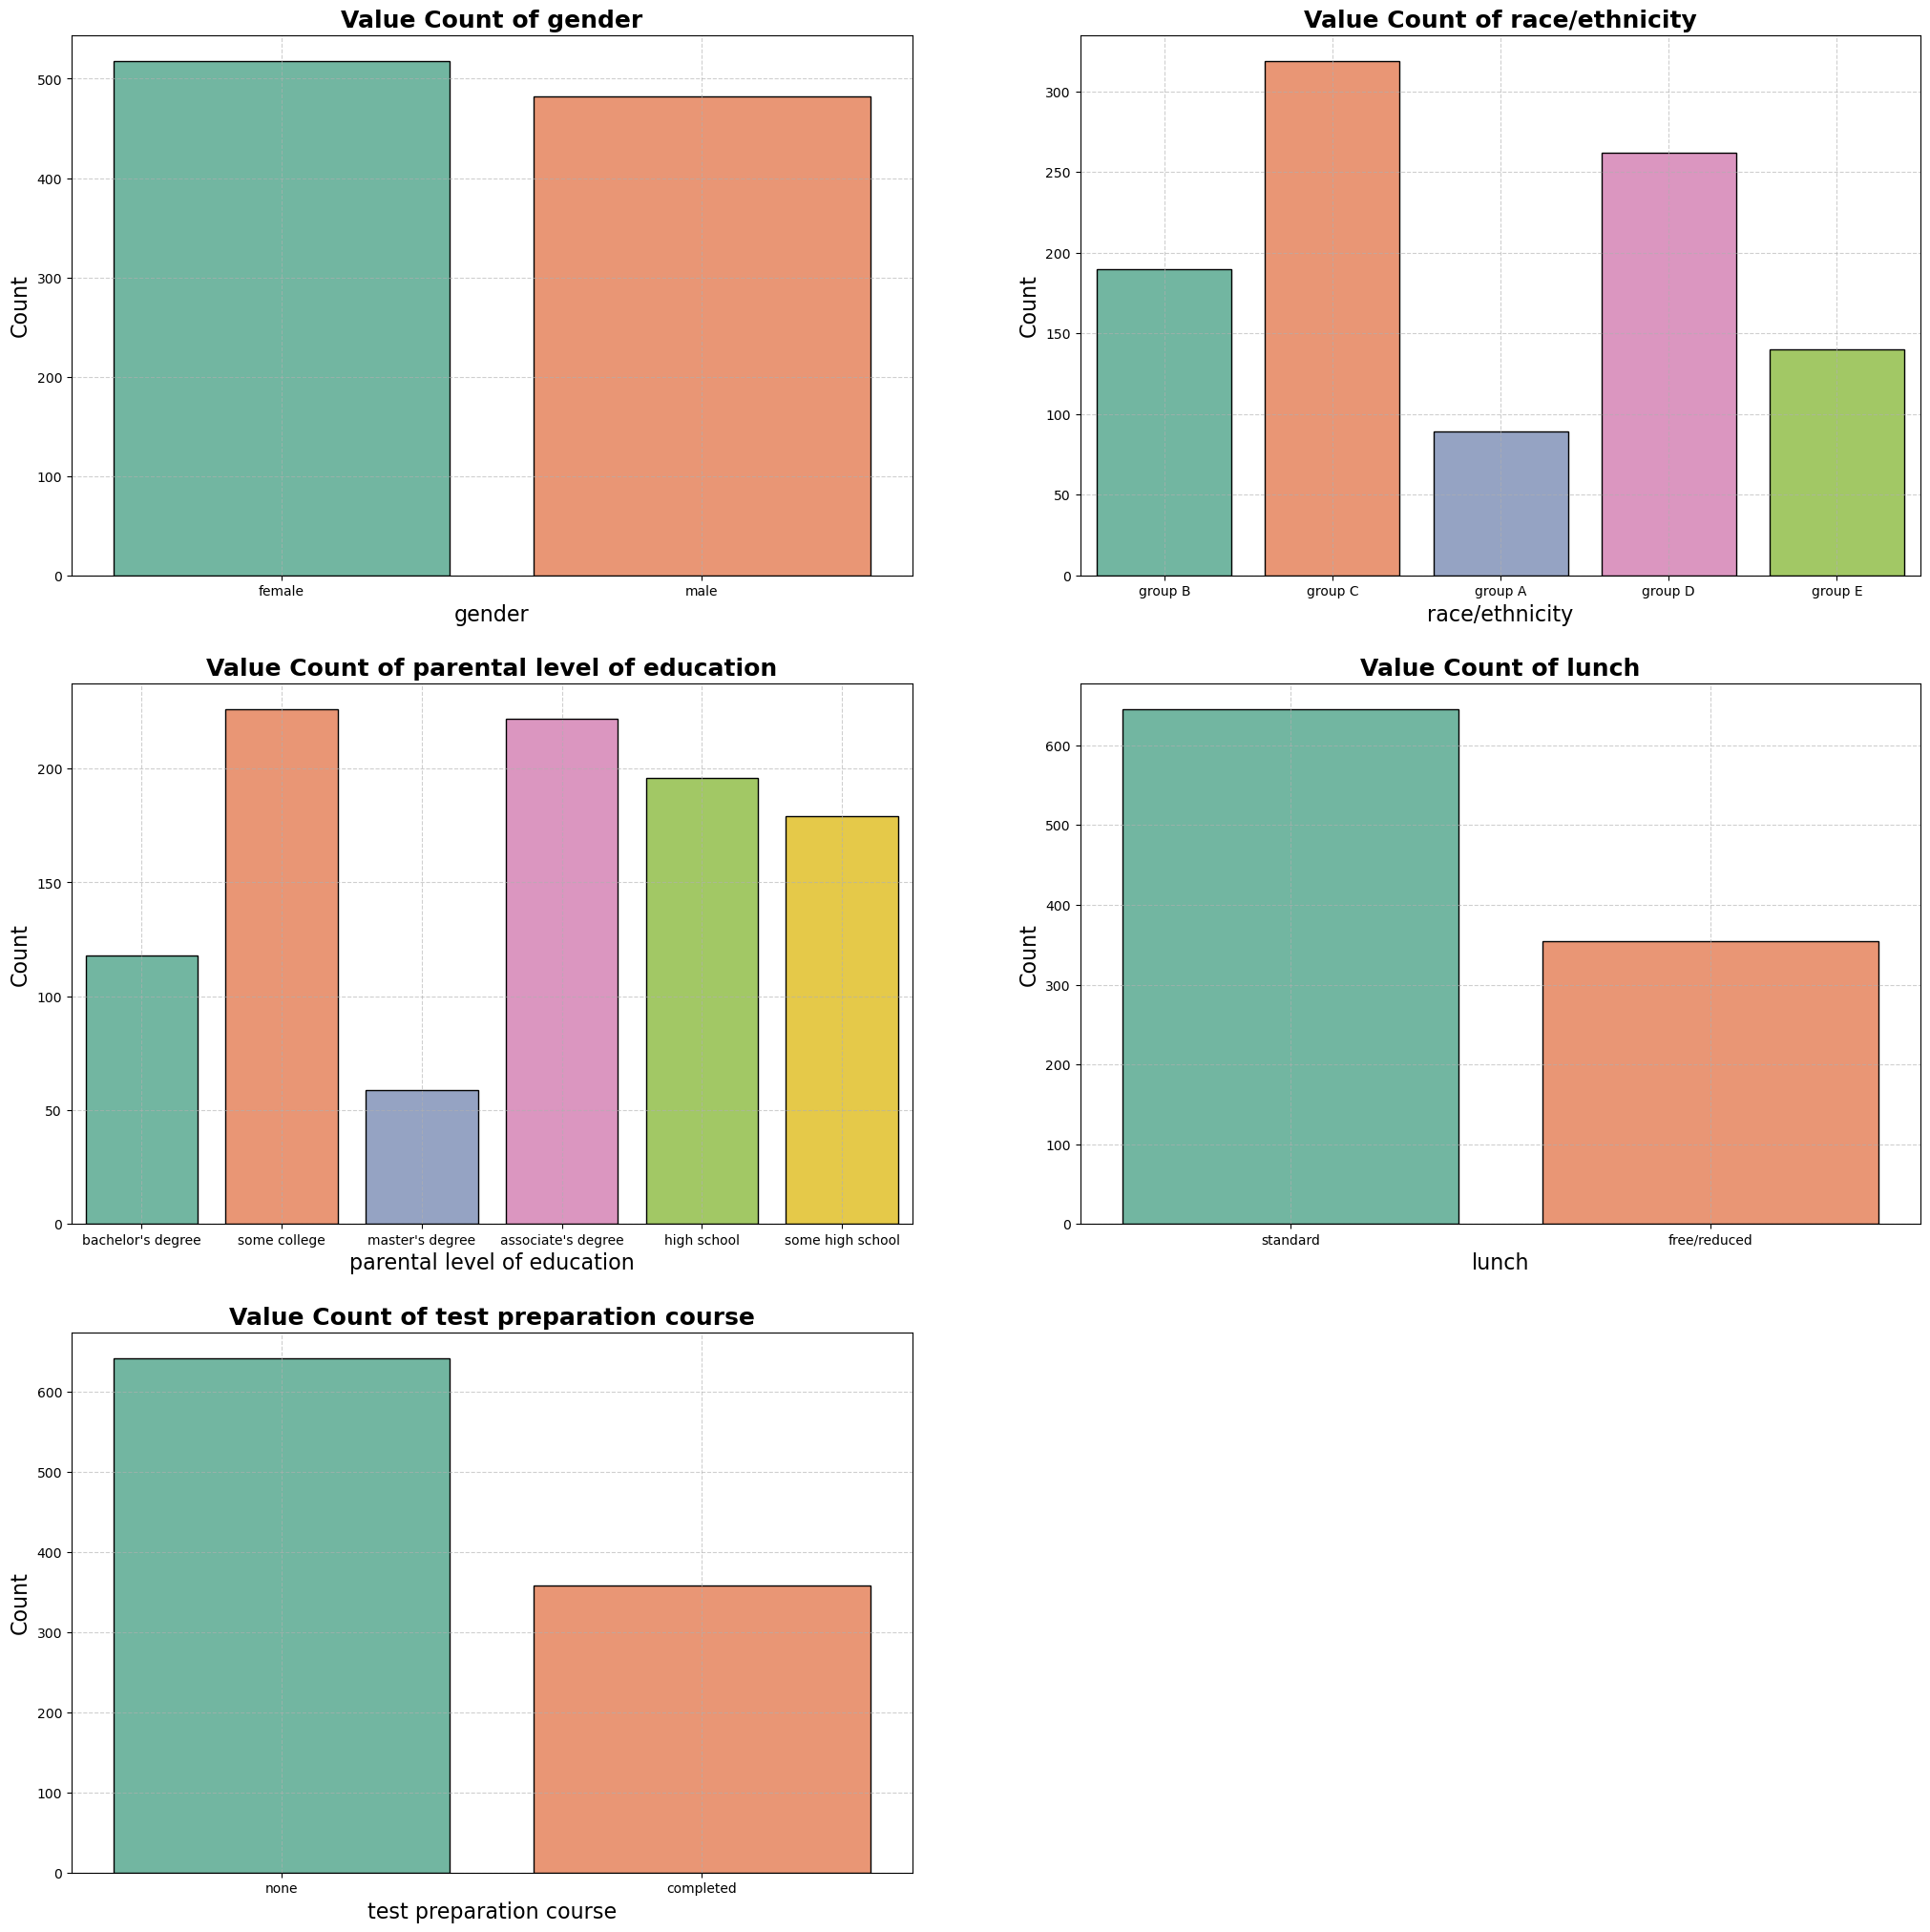

In [7]:
plt.figure(figsize=(25, 25))

for i, feature in enumerate(data.columns, start=1):
    if feature not in ['math score', 'reading score', 'writing score']:
        plt.subplot(3, 2, i)  
        sns.countplot(data=data, x=feature, edgecolor='black', palette='Set2')
        plt.title(f"Value Count of {feature}", fontsize=18, fontweight='bold')
        plt.xlabel(feature, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

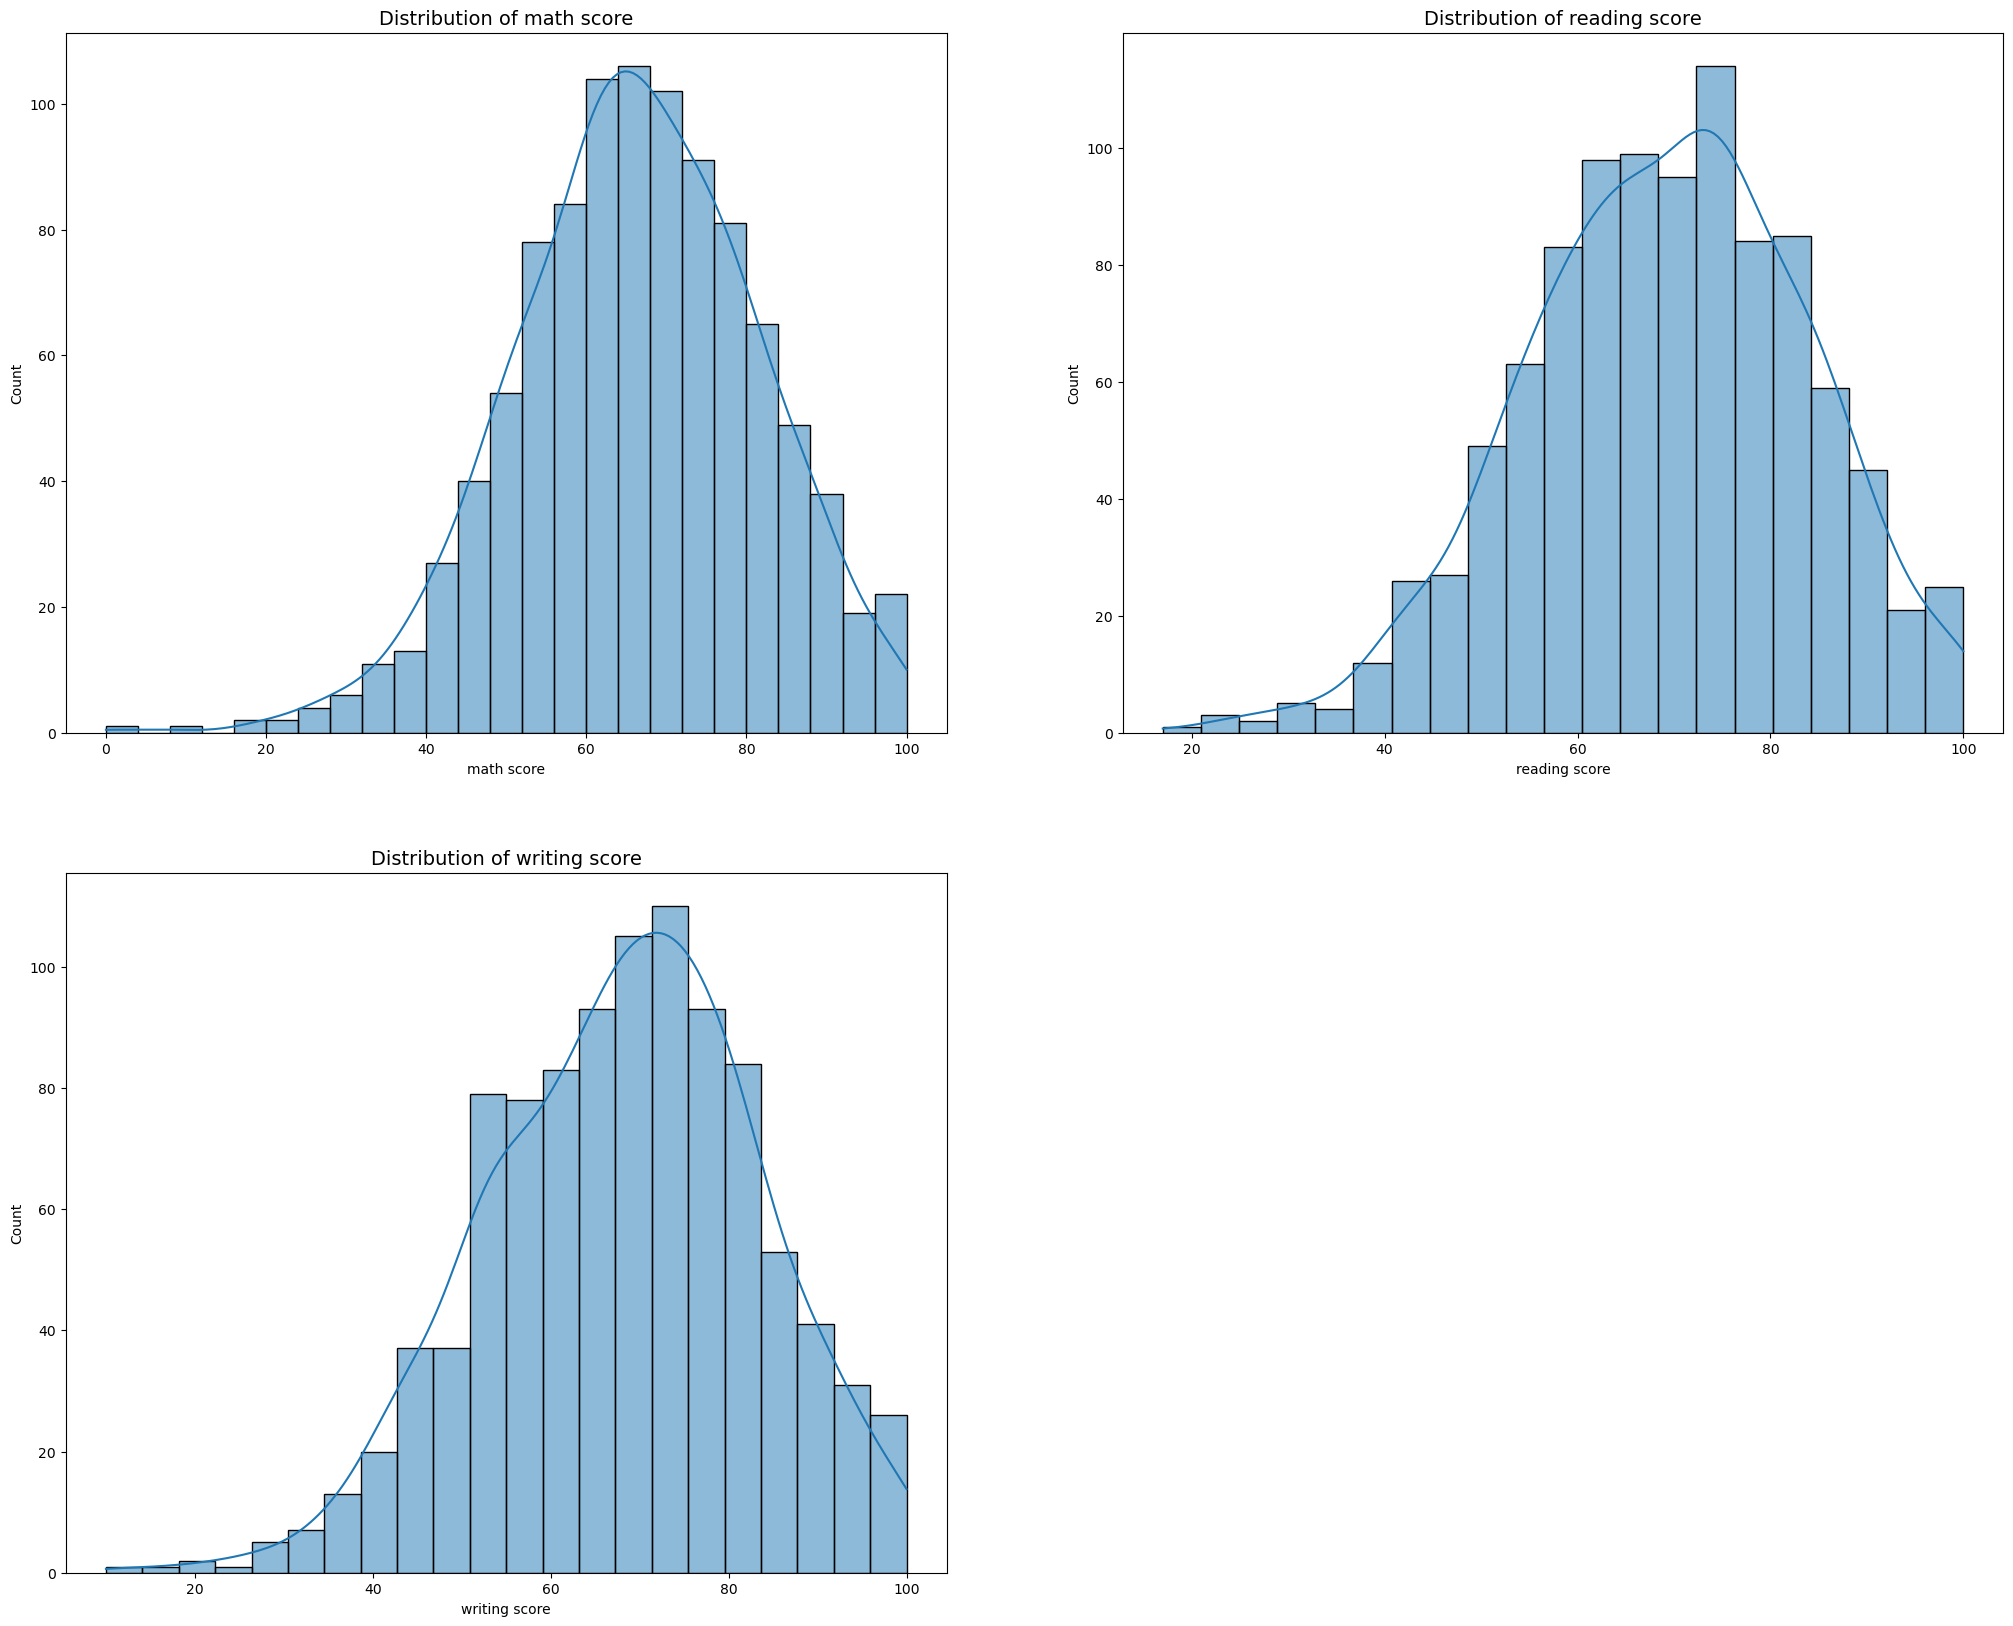

In [8]:
plt.figure(figsize=(25,20))

for i, feature in enumerate(['math score', 'reading score', 'writing score'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, kde=True, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=14)
  
plt.show()

In [9]:
# new_data = pd.get_dummies(data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
# new_data = pd.DataFrame(new_data)
# new_data

In [10]:
# for feature in new_data.columns:
#     new_data[feature] = new_data[feature].astype(int)

# new_data

In [11]:
X = data.drop('math score', axis=1)
y = data['math score']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (800, 7)
X_test: (200, 7)
y_train: (800,)
y_test: (200,)


In [13]:
X_train = pd.get_dummies(X_train, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
X_train = pd.DataFrame(X_train)
X_train

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
40,61,54,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
977,65,58,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
829,54,53,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True
973,65,61,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
874,62,61,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,54,67,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
118,63,61,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
701,67,72,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True
206,62,62,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True


In [14]:
for feature in X_train.columns:
    X_train[feature] = X_train[feature].astype(int)

X_train

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
40,61,54,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
977,65,58,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
829,54,53,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
973,65,61,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
874,62,61,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,54,67,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
118,63,61,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
701,67,72,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
206,62,62,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


In [15]:
X_test_dup = X_test
X_test = pd.get_dummies(X_test, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
X_test = pd.DataFrame(X_test)
X_test

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
544,63,66,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True
515,87,85,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
193,62,62,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False
11,52,43,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True
279,56,57,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,62,53,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
379,64,62,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True
896,29,27,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True
809,54,51,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True


In [16]:
for feature in X_test.columns:
    X_test[feature] = X_test[feature].astype(int)

X_test

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
544,63,66,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
515,87,85,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
193,62,62,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
11,52,43,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
279,56,57,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,62,53,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
379,64,62,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
896,29,27,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
809,54,51,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [17]:
X_test_dup

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
544,female,group D,master's degree,standard,none,63,66
515,female,group C,some high school,standard,completed,87,85
193,male,group D,some college,standard,completed,62,62
11,male,group D,associate's degree,standard,none,52,43
279,male,group B,bachelor's degree,free/reduced,none,56,57
...,...,...,...,...,...,...,...
860,female,group C,associate's degree,standard,none,62,53
379,male,group A,bachelor's degree,standard,none,64,62
896,male,group B,high school,free/reduced,none,29,27
809,male,group B,bachelor's degree,standard,none,54,51


In [18]:
algorithms = {
    'decisionTreeModel': DecisionTreeRegressor(),
    'randomForestModel': RandomForestRegressor(),
    'linearRegressionModel': LinearRegression()
}

modelPerformance = {}

In [19]:
for model_name, model in algorithms.items():
    np.random.seed(5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    modelPerformance[model_name] = mean_squared_error(y_test, pred)

In [20]:
modelPerformance

{'decisionTreeModel': 79.84,
 'randomForestModel': 39.34654577777777,
 'linearRegressionModel': 29.789231353158662}

In [21]:
studentPerformancePrediction = pd.DataFrame(pred, columns=["Predicted_Math_Score"])
testingResults = pd.concat([X_test_dup.reset_index(drop=True), studentPerformancePrediction], axis=1)

testingResults

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,Predicted_Math_Score
0,female,group D,master's degree,standard,none,63,66,56.127193
1,female,group C,some high school,standard,completed,87,85,74.717371
2,male,group D,some college,standard,completed,62,62,64.942880
3,male,group D,associate's degree,standard,none,52,43,52.608135
4,male,group B,bachelor's degree,free/reduced,none,56,57,59.413309
...,...,...,...,...,...,...,...,...
195,female,group C,associate's degree,standard,none,62,53,49.031701
196,male,group A,bachelor's degree,standard,none,64,62,67.825210
197,male,group B,high school,free/reduced,none,29,27,32.871816
198,male,group B,bachelor's degree,standard,none,54,51,58.054721


In [22]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.493506,0.458824,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.545455,0.505882,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.402597,0.447059,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.545455,0.541176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.506494,0.541176,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.402597,0.611765,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
796,0.519481,0.541176,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
797,0.571429,0.670588,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
798,0.506494,0.552941,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
def scaled_data(data):
    scaled_data = scaler.transform(data)
    scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
    return scaled_data

In [24]:
X_test_scaled = scaled_data(X_test)
X_test_scaled

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.519481,0.600000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.831169,0.823529,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.506494,0.552941,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.376623,0.329412,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.428571,0.494118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.506494,0.447059,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
196,0.532468,0.552941,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
197,0.077922,0.141176,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.402597,0.423529,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
modelPerformanceScaled = {}

for model_name, model in algorithms.items():
    np.random.seed(5)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    modelPerformanceScaled[model_name] = mean_squared_error(y_test, pred)

modelPerformanceScaled

{'decisionTreeModel': 80.16,
 'randomForestModel': 39.36904827777777,
 'linearRegressionModel': 30.001484375}

In [26]:
modelPerformance

{'decisionTreeModel': 79.84,
 'randomForestModel': 39.34654577777777,
 'linearRegressionModel': 29.789231353158662}

***Working without scaling the data for baseline modeling worked better.***

**Model Performance Notes:**
1. **Target Variable:** Math Score (0-100).
2. **RMSE (Lower is better):**
   - Linear Regression: ***5.46 (Best)***
   - Random Forest: ***6.27***
   - Decision Tree: ***8.94 (Worst)***
3. **Key Observations:**
   - Linear Regression performs well (error ~5% of score range).
   - Random Forest is good but could improve with tuning.
   - Decision Tree likely overfits; try limiting depth.
4. **Next Steps:**
   - Use cross-validation for reliable evaluation.
   - Tune hyperparameters (e.g., `max_depth`, `n_estimators`).
   - Explore Gradient Boosting (e.g., XGBoost).